###                                  <center> CSE555 – Deep Learning (Spring 2018) center
###                                               <center> Homework 1 </center>
### <center>Part 1: Model a deep feed forward network for regression</center>
###                                    <center>   Harlinton Palacios Mosquera </center>
                                   
###                                       <center>  ID: 161041033  </center>                                        
                             

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from keras.layers import Activation
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import sklearn

C:\Users\Harlinton\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In this section I created a baseline neural network model for the regression problem. Let’s start off by including all of the functions and objects we will need for this homework.

In [6]:
epoch = 370
insize = 1
batch  = 75
n = 936

n_train= int(n*0.8)
n_test = int(n*0.2)
x_train=np.random.rand(900)
y_train=x_train**4+x_train**3-x_train
x_train=x_train.reshape(len(x_train),1)
x_test=np.linspace(0,1,100)
y_test=x_test**4+x_test**3-x_test
x_test=x_test.reshape(len(x_test),1)
x_train.shape

(900, 1)

<b>Comment:</b> Here I generated my data from a polynomial of fourth degree with the help of the package (Panda.rondom). I also define some variables for the percentage of data to train, to test the neural network, the number of Epochs, number of input data and Batch number

In [3]:
def Create_network(): 
    network = Sequential()
    network.add(Dense(5, input_dim=insize, kernel_initializer="normal", activation="elu"))
    network.add(Dense(5, kernel_initializer="normal", activation="relu"))
    network.add(Dense(5, kernel_initializer="normal", activation="relu"))
    network.add(Dense(1, activation="sigmoid"))  
   
    network.compile(loss="mean_squared_error", optimizer="adam")
    #network.compile(loss="mean_squared_error", optimizer="Adamax")
     #network.compile(loss="mean_squared_error", optimizer="rmsprop")
    #network.compile(loss="mean_squared_error", optimizer="sgd")
    #network.compile(loss='mean_squared_error',optimizer=sgd,metrics=['mae', 'acc'])
    return network

network = Create_network()


<b>Comment:</b> Here I defined the function to create the model of the nueronal network. It is a model that has 4 hidden layers totally connected and the activation parameter is (Relu) and the activation parameter of the neuron of output is (Linear). The first thing the network used was an activation function of the rectifier for the hidden layer, which is called the SGD optimization algorithm, it is used efficiently and a quadratic error loss function is optimized, this will be the same measure that we will use for evaluate the performance of the model and MSE Calculate the average square error rate between the predicted and target values.

That's the first network model.
<img src="https://image.ibb.co/g08DoS/Screenshot_from_2018_03_09_09_06_16.png" alt="Drawing" style="width: 500px;"/>

That's the final network model.
<img src="https://image.ibb.co/mZY2hn/Screenshot_from_2018_03_09_09_03_54.png" alt="Drawing" style="width: 500px;"/>

In [4]:
history = network.fit( x_train, y_train, batch_size=batch, epochs=epoch, verbose=1, validation_split=0.33)


Train on 602 samples, validate on 298 samples
Epoch 1/370


InternalError: Blas GEMM launch failed : a.shape=(75, 1), b.shape=(1, 5), m=75, n=5, k=1
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_dense_1_input_0/_87, dense_1/kernel/read)]]
	 [[Node: loss/mul/_119 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_513_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'dense_1/MatMul', defined at:
  File "C:\Users\Harlinton\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Harlinton\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-12006b3de999>", line 15, in <module>
    network = Create_network()
  File "<ipython-input-3-12006b3de999>", line 3, in Create_network
    network.add(Dense(5, input_dim=insize, kernel_initializer="normal", activation="elu"))
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\keras\models.py", line 467, in add
    layer(x)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\keras\engine\topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\keras\layers\core.py", line 855, in call
    output = K.dot(inputs, self.kernel)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 1075, in dot
    out = tf.matmul(x, y)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1801, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 1263, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2336, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Harlinton\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1228, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(75, 1), b.shape=(1, 5), m=75, n=5, k=1
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_dense_1_input_0/_87, dense_1/kernel/read)]]
	 [[Node: loss/mul/_119 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_513_loss/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In this section I train the specified model some parameters 
 like epochs number: Number of epochs to train the model
 lot size: Number of samples per gradient update
 training variables x_train, y_train: Numpy array of training data
 validation_split: Fraction of the training data to be used as validation data


In [5]:
historyval = network.evaluate(x_test, y_test, batch_size=batch, verbose=1)
print("\nLoss: %.2f" % (historyval))
predi = network.predict(x_test, batch_size=batch, verbose=0, steps=None)


100/100 [==============================] - 0s 190us/step

Loss: 0.11


In this section, carry out the evaluation of the network, specifying the necessary parameters, such as the variables for their respective evaluation, which has a resevated percentage of the initial data. there is also a parameter to print the result of the evaluation

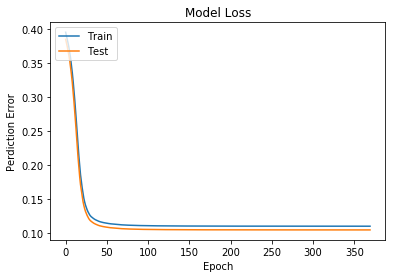

In [6]:
#print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Perdiction Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In this section, I obtain the results of the data of the varibals. Val_loss is the value of the cost function for the cross-validation data and the loss is the value of the cost function for your training data and with these results graph the graph where it shows the comparison of the performance of the neural network in training and evaluation

# Reports step by step:
## <b>Point 5: Parameters used:</b> 
Neural network: It has 4 hidden layers,they use the same activation function (tanh), the SGD optimizer was used, mean_squared_error(MSE) also loss function and Epochs number was 200, Batchs number was 50. with these parameters this result was obtained:
### I got  loss = 0.11
<img src="https://image.ibb.co/e64sV7/1.png" alt="Drawing" style="width: 500px;"/>


### <b>Point 6: Parameters used:</b> 
 ### <b>First combination used:</b>
 The (rmsprop) optimizer, changed Epoch number was 250 and Batchs number was 70 and used activation funtion (tanh) <b>I got Loss: 0.16</b>
 ### <b>second combination used:</b>
 The (adam) optimizer, changed Epoch number was 375(+50%) and Batchs number was 75 and used activation funtion (selu):Scaled Exponential Linear Unit  <b>I got Loss: 0.10</b>
  ### <b>third combination used:</b>
 The (Adamax) optimizer, changed Epoch number was 375(+50%) and Batchs number was 60 and used activation funtion (elu):<b> I got Loss: 0.014</b>
 
### <b>Point 7:</b>  
## According to the results obtained during these 3 combinations, the best combination was the second in which a much faster and less expensive result was obtained where the variable Loss was 0.10


# <b>Point 8: Parameters used:</b> 

## #--The first hidden layer, add one node
-This time I added a node to the first layer, which was with 5 nodes one more than the other 3 educated layers and the result of the variable Loss did not change much, only increased 0.01 more.
 <img src="https://image.ibb.co/dFBMQ7/Screenshot_from_2018_03_09_06_04_30.png" alt="Drawing" style="width: 500px;"/>
  <img src="https://image.ibb.co/e4zEdS/Screenshot_from_2018_03_09_06_47_51.png" alt="Drawing" style="width: 500px;"/>

## #--The secund hidden layer, add one node
-This time I added a node to the second layer, in total it has 5 nodes. when adding this new node I do not see difference in the result, the loss variable obtained 0.11 igulates that the last result
 <img src="https://image.ibb.co/f9t7yS/Screenshot_from_2018_03_09_06_16_52.png" alt="Drawing" style="width: 500px;"/>
 <img src="https://image.ibb.co/kuxWsn/Screenshot_from_2018_03_09_07_19_00.png" alt="Drawing" style="width: 500px;"/>
 

## #--The third hidden layer, add one node
This time I added a node to the trird layer, in total it has 5 nodes. when adding this new node I do not see difference in the result, the loss variable obtained 0.11 igulates that the last result
 <img src="https://image.ibb.co/cvZY57/Screenshot_from_2018_03_09_06_29_45.png" alt="Drawing" style="width: 500px;"/>
 <img src="https://image.ibb.co/fOjxF7/Screenshot_from_2018_03_09_07_33_02.png" alt="Drawing" style="width: 500px;"/>
 
 
 
 # <b>Point 9: I entered the value of (Nt) 4% and its new value was (936) and performed all the steps of point 8. :</b>  
 
 ## #--The first hidden layer, add one node
 <img src="https://image.ibb.co/kGqZTS/Screenshot_from_2018_03_09_07_59_13.png" alt="Drawing" style="width: 900px;"/>
  

## #--The secund hidden layer, add one node
 <img src="https://image.ibb.co/iQgBa7/Screenshot_from_2018_03_09_08_05_12.png" alt="Drawing" style="width: 900px;"/>

 

## #--The third hidden layer, add one node
 <img src="https://image.ibb.co/n5JDoS/Screenshot_from_2018_03_09_08_09_47.png" alt="Drawing" style="width: 900px;"/>

 
 
 
<b>Coment:</b>  In general, this neural network during the different modifications of the parameters of the nerural network, the parameter that generated the most effects or modified the result were  the activation function and the number of Eposh and the number of (blocks). When making changes to those data I could notice the difference between the results in both the loss graph and the loss variable. in the case that I did not see much difference was when I added more 1 node to each layer, I guess you can not notice much result because the added nodes were not many, only one was for each layer.
Another important aspect were that when adding a node to all the layers, the behavior of the graph was a little different, where it can be seen that the test had a difference in relation to the training, considering the past graphs that are almost not noticed as much difference.
 